# Minimum free energy paths in 2D free energy landscape computed from MD simulation trajectories

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import stringmethod

In [2]:
xvals = []
yvals = []

with open("traj.dat") as f:
    for line in f:
        if line.strip()[0] != '#':
            vals = [float(val) for val in line.strip().split()]
            xvals.append(vals[1])
            yvals.append(vals[2])

xvals = np.array(xvals)
yvals = np.array(yvals)

counts, xbins, ybins = np.histogram2d(xvals, yvals, bins=[100, 100], range=[[-12, 15], [-6, 8]])
counts[counts == 0] = counts[counts != 0].min()
betaF = -np.log(counts)
betaF = betaF - np.min(betaF)

In [3]:
S = stringmethod.String2D(xbins[:-1], ybins[:-1], betaF, indexing='ij')

(<Figure size 1800x1200 with 2 Axes>,
 <matplotlib.colorbar.Colorbar at 0x7fe44ebbb110>)

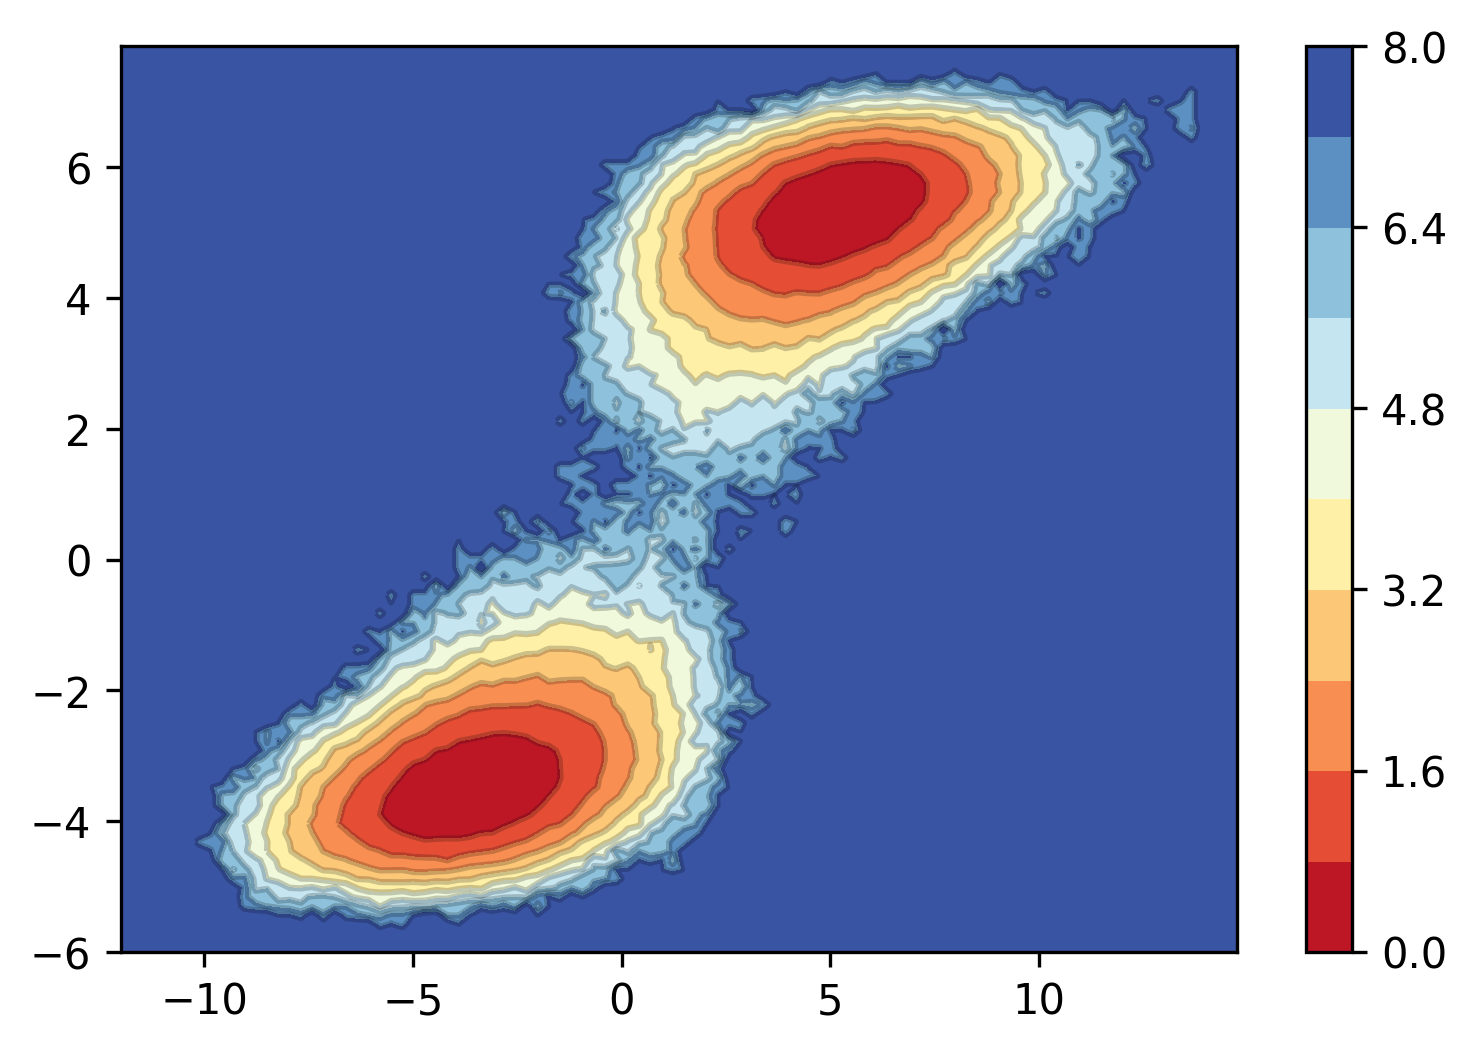

In [4]:
S.plot_V(clip_max=8, levels=10)

In [5]:
S.compute_mep(begin=[-4, -4], end=[5, 6], maxsteps=200, traj_every=10)

  5%|██                                        | 10/200 [00:09<03:30,  1.11s/it]

Change in string: 0.0129558876


 10%|████▏                                     | 20/200 [00:21<03:01,  1.01s/it]

Change in string: 0.0084032231


 15%|██████▎                                   | 30/200 [00:33<04:31,  1.60s/it]

Change in string: 0.0124951264


 20%|████████▍                                 | 40/200 [00:45<02:29,  1.07it/s]

Change in string: 0.0073492608


 25%|██████████▌                               | 50/200 [00:51<01:48,  1.39it/s]

Change in string: 0.0028903319


 30%|████████████▌                             | 60/200 [00:57<01:22,  1.71it/s]

Change in string: 0.0021474075


 35%|██████████████▋                           | 70/200 [01:07<02:18,  1.07s/it]

Change in string: 0.0016467301


 40%|████████████████▊                         | 80/200 [01:14<01:22,  1.46it/s]

Change in string: 0.0014474294


 45%|██████████████████▉                       | 90/200 [01:20<01:04,  1.70it/s]

Change in string: 0.0019238609


 50%|████████████████████▌                    | 100/200 [01:26<01:00,  1.65it/s]

Change in string: 0.0023384600


 55%|██████████████████████▌                  | 110/200 [01:32<00:53,  1.69it/s]

Change in string: 0.0015797970


 60%|████████████████████████▌                | 120/200 [01:39<01:02,  1.27it/s]

Change in string: 0.0025518593


 65%|██████████████████████████▋              | 130/200 [01:48<00:54,  1.29it/s]

Change in string: 0.0016134184


 70%|████████████████████████████▋            | 140/200 [01:57<01:03,  1.06s/it]

Change in string: 0.0008653479


 75%|██████████████████████████████▊          | 150/200 [02:05<00:38,  1.29it/s]

Change in string: 0.0007343663


 80%|████████████████████████████████▊        | 160/200 [02:12<00:27,  1.43it/s]

Change in string: 0.0005264052


 85%|██████████████████████████████████▊      | 170/200 [02:19<00:17,  1.72it/s]

Change in string: 0.0004089268


 90%|████████████████████████████████████▉    | 180/200 [02:24<00:10,  1.93it/s]

Change in string: 0.0003150622


 95%|██████████████████████████████████████▉  | 190/200 [02:29<00:04,  2.12it/s]

Change in string: 0.0002418697


100%|█████████████████████████████████████████| 200/200 [02:35<00:00,  1.28it/s]

Change in string: 0.0001888301


(<Figure size 1800x1200 with 2 Axes>,
 <matplotlib.colorbar.Colorbar at 0x7fe44ed275d0>)

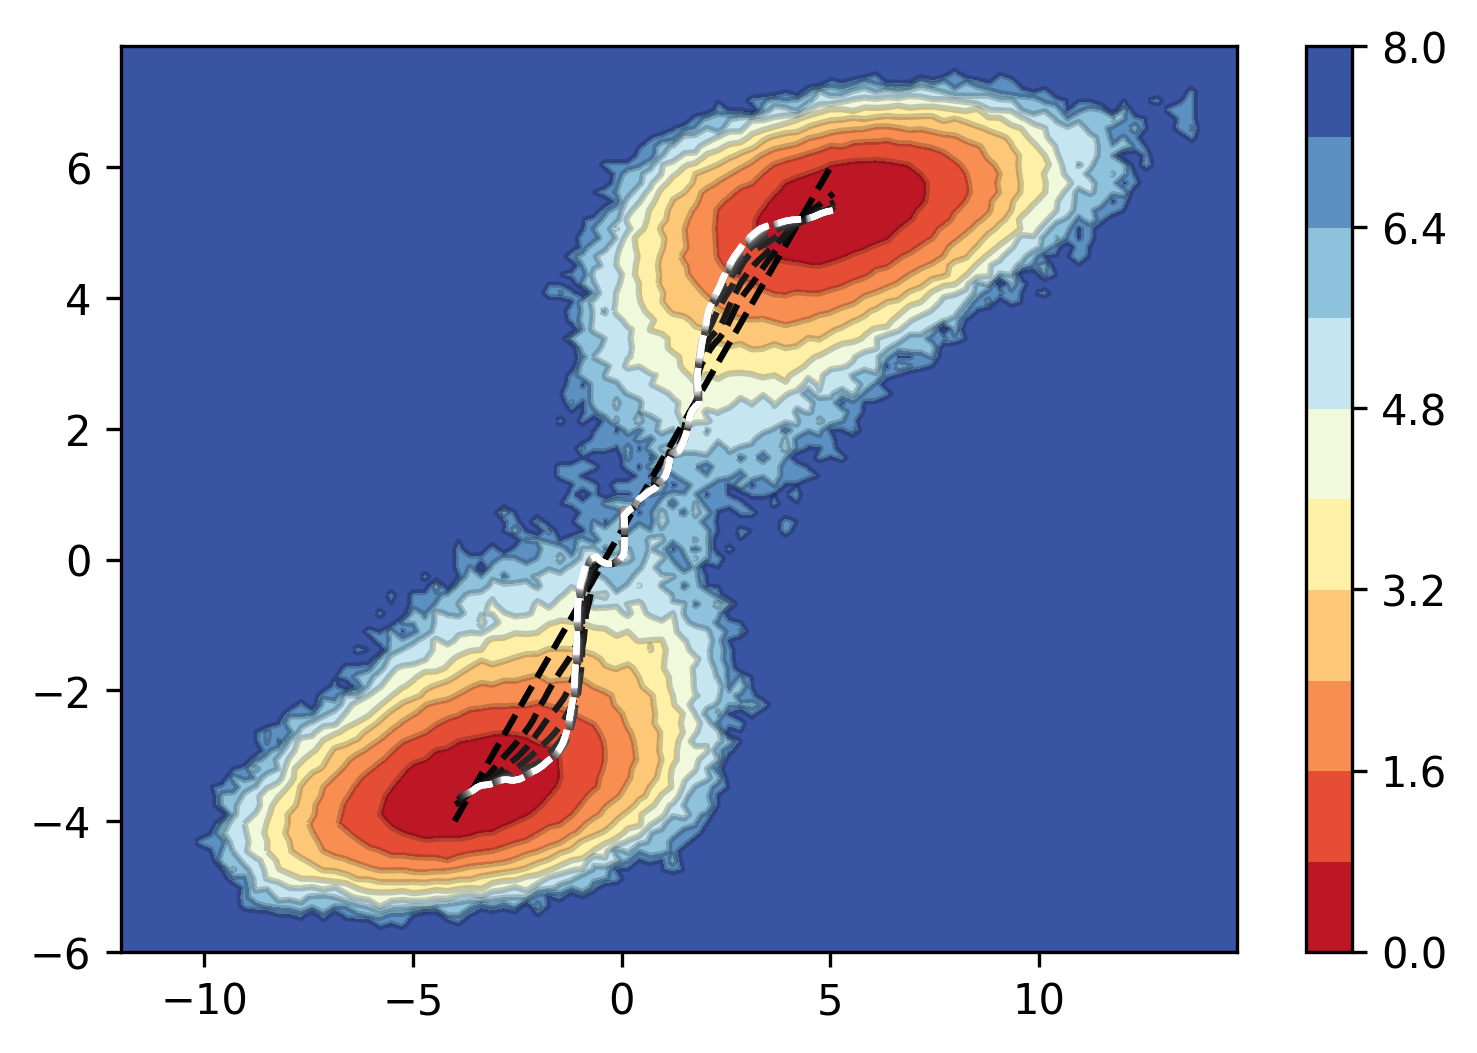

In [6]:
S.plot_string_evolution(clip_max=8, levels=10)

(<Figure size 1800x1200 with 2 Axes>,
 <matplotlib.colorbar.Colorbar at 0x7fe44ee7bed0>)

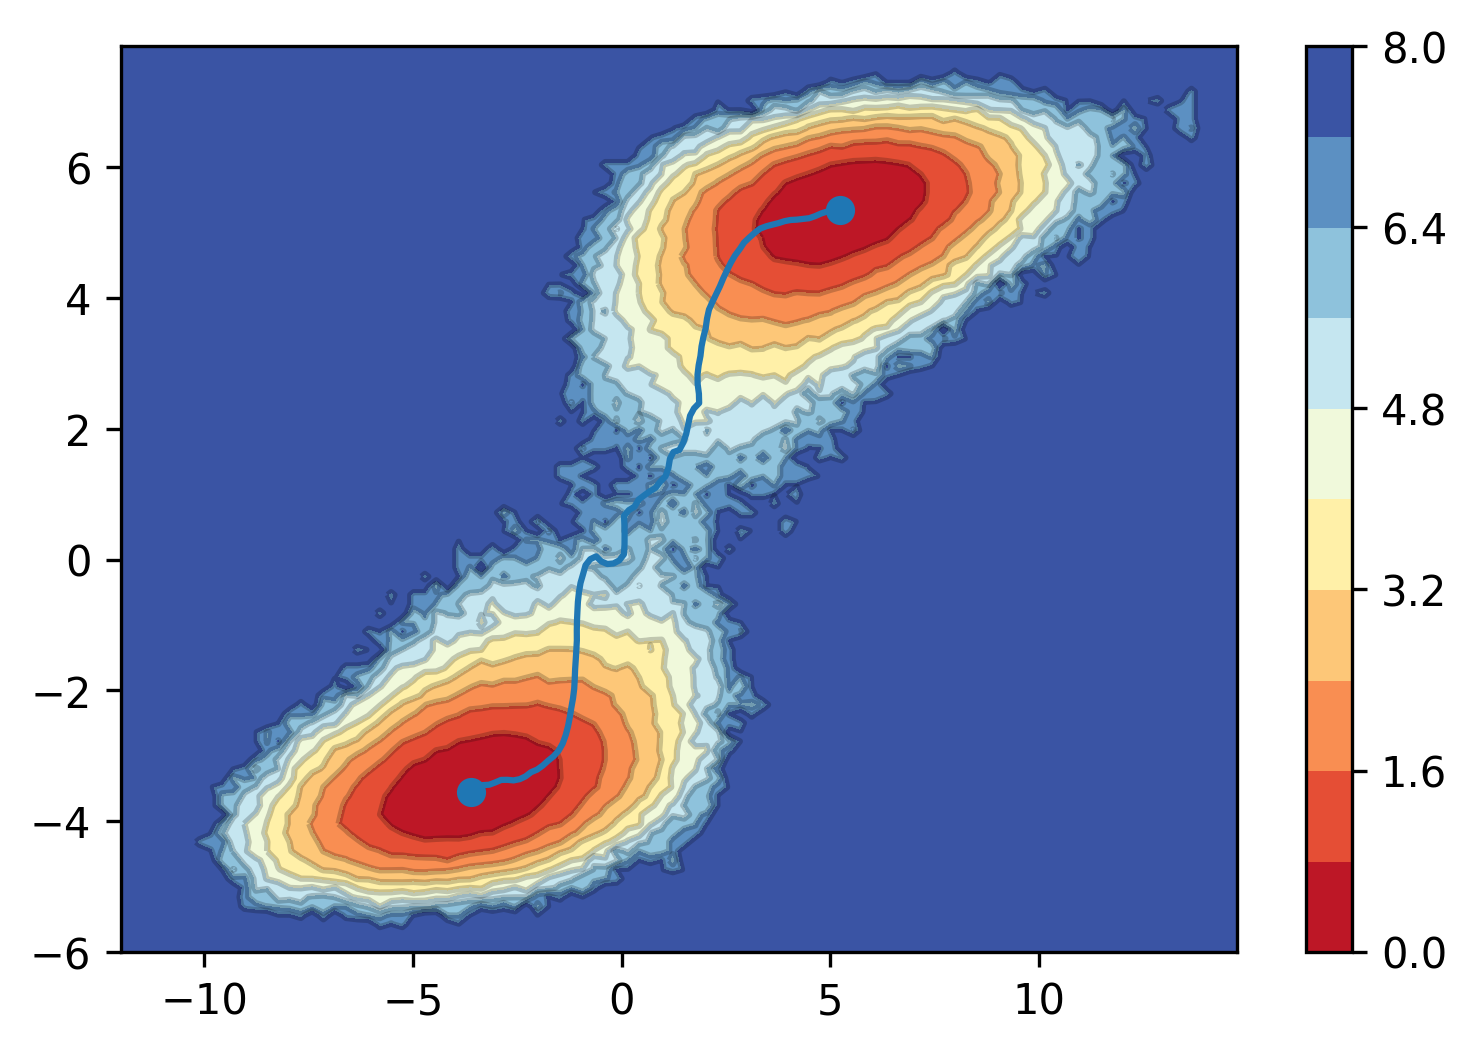

In [7]:
S.plot_mep(clip_max=8, levels=10)

(<Figure size 1800x1200 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe44ef05f10>)

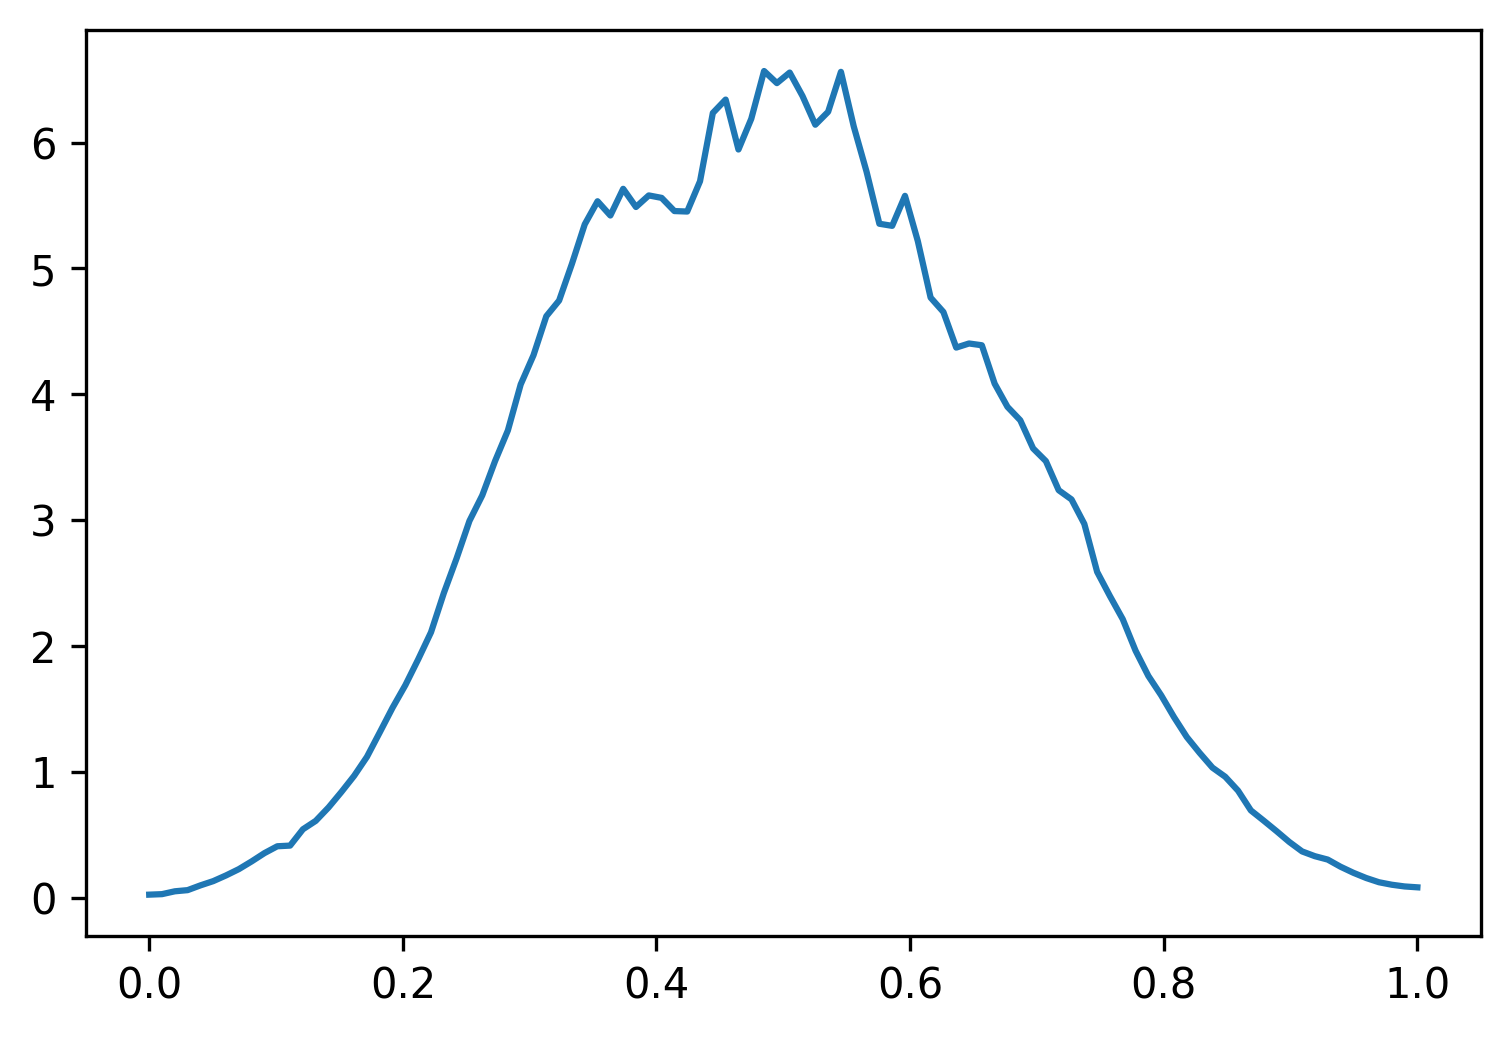

In [8]:
S.plot_mep_energy_profile()

## Comparison: analytical potential

In [9]:
def slip_bond(x, y):
    force_x=0
    force_y=0
    y_0=1
    y_scale=5
    y_shift=4
    xy_0=0
    xy_scale=2
    return ((y - y_0) ** 2 / y_scale - y_shift) ** 2 + (x - y - xy_0) ** 2 / xy_scale - force_x * x - force_y * y

In [10]:
x = np.linspace(-12, 15, 100)
y = np.linspace(-6, 8, 100)
xx, yy = np.meshgrid(x, y)
V = 1000 / (8.314 * 300) * slip_bond(xx, yy)

In [11]:
S = stringmethod.String2D(x, y, V)

(<Figure size 1800x1200 with 2 Axes>,
 <matplotlib.colorbar.Colorbar at 0x7fe44f67da10>)

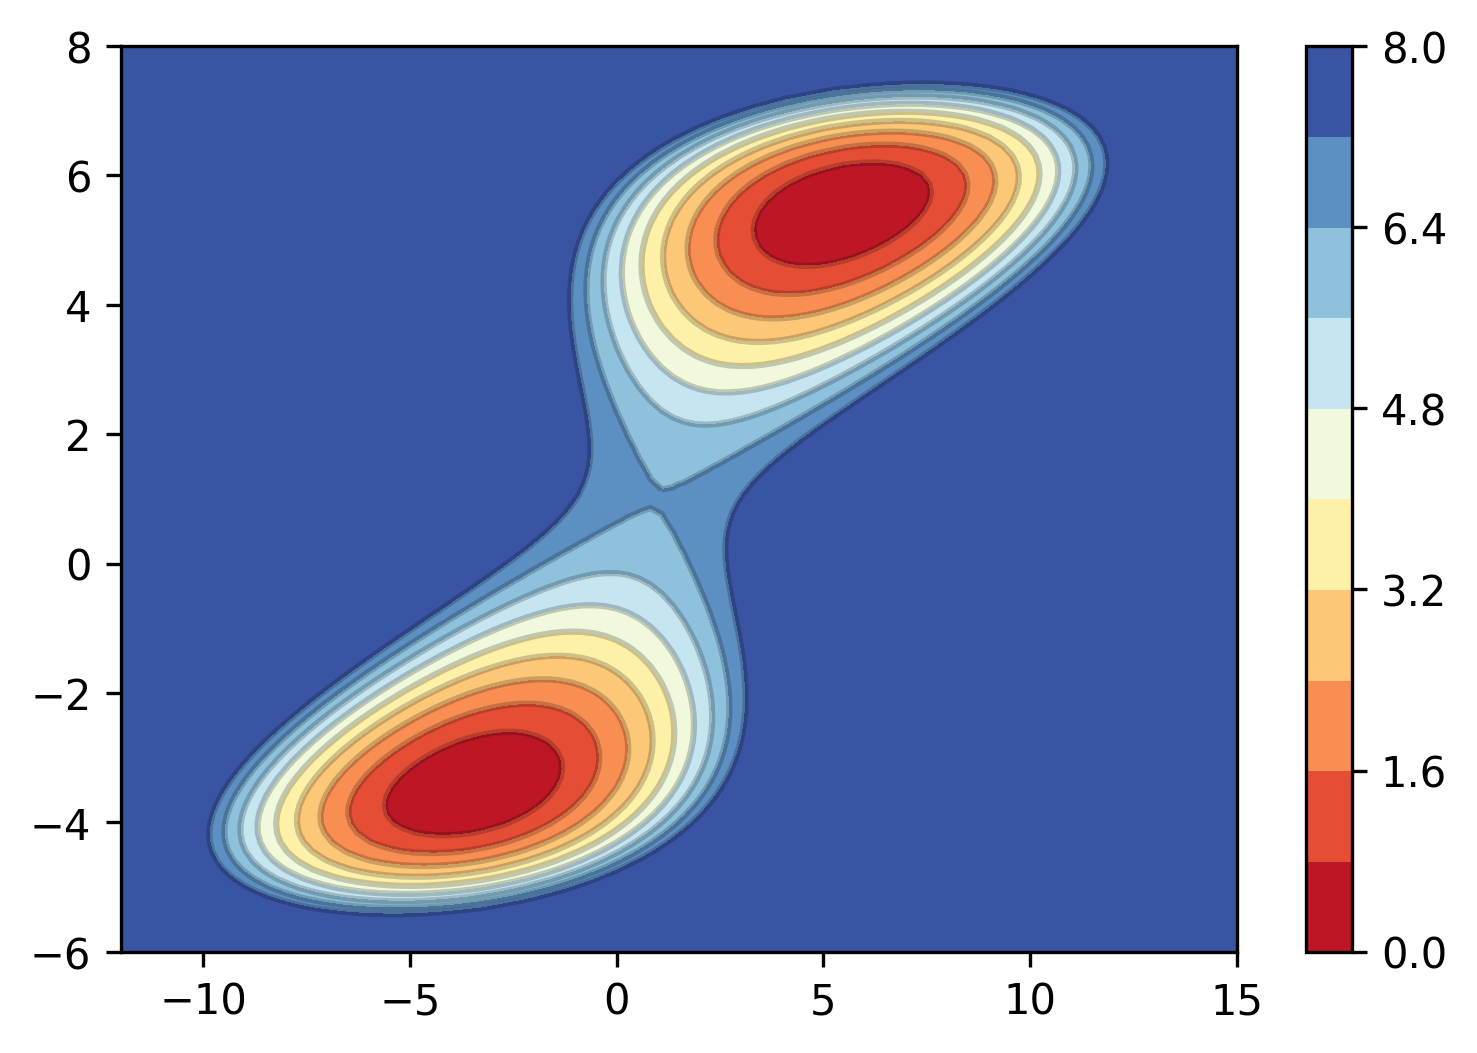

In [12]:
S.plot_V(clip_max=8, levels=10)

In [13]:
S.compute_mep(begin=[-4, -4], end=[5, 6], maxsteps=50, traj_every=10)

 20%|████████▌                                  | 10/50 [00:06<00:24,  1.64it/s]

Change in string: 0.0162971421


 40%|█████████████████▏                         | 20/50 [00:11<00:16,  1.86it/s]

Change in string: 0.0074883819


 60%|█████████████████████████▊                 | 30/50 [00:18<00:13,  1.54it/s]

Change in string: 0.0039126800


 80%|██████████████████████████████████▍        | 40/50 [00:24<00:06,  1.64it/s]

Change in string: 0.0022167678


100%|███████████████████████████████████████████| 50/50 [00:30<00:00,  1.65it/s]

Change in string: 0.0013038186


(<Figure size 1800x1200 with 2 Axes>,
 <matplotlib.colorbar.Colorbar at 0x7fe44fb5e290>)

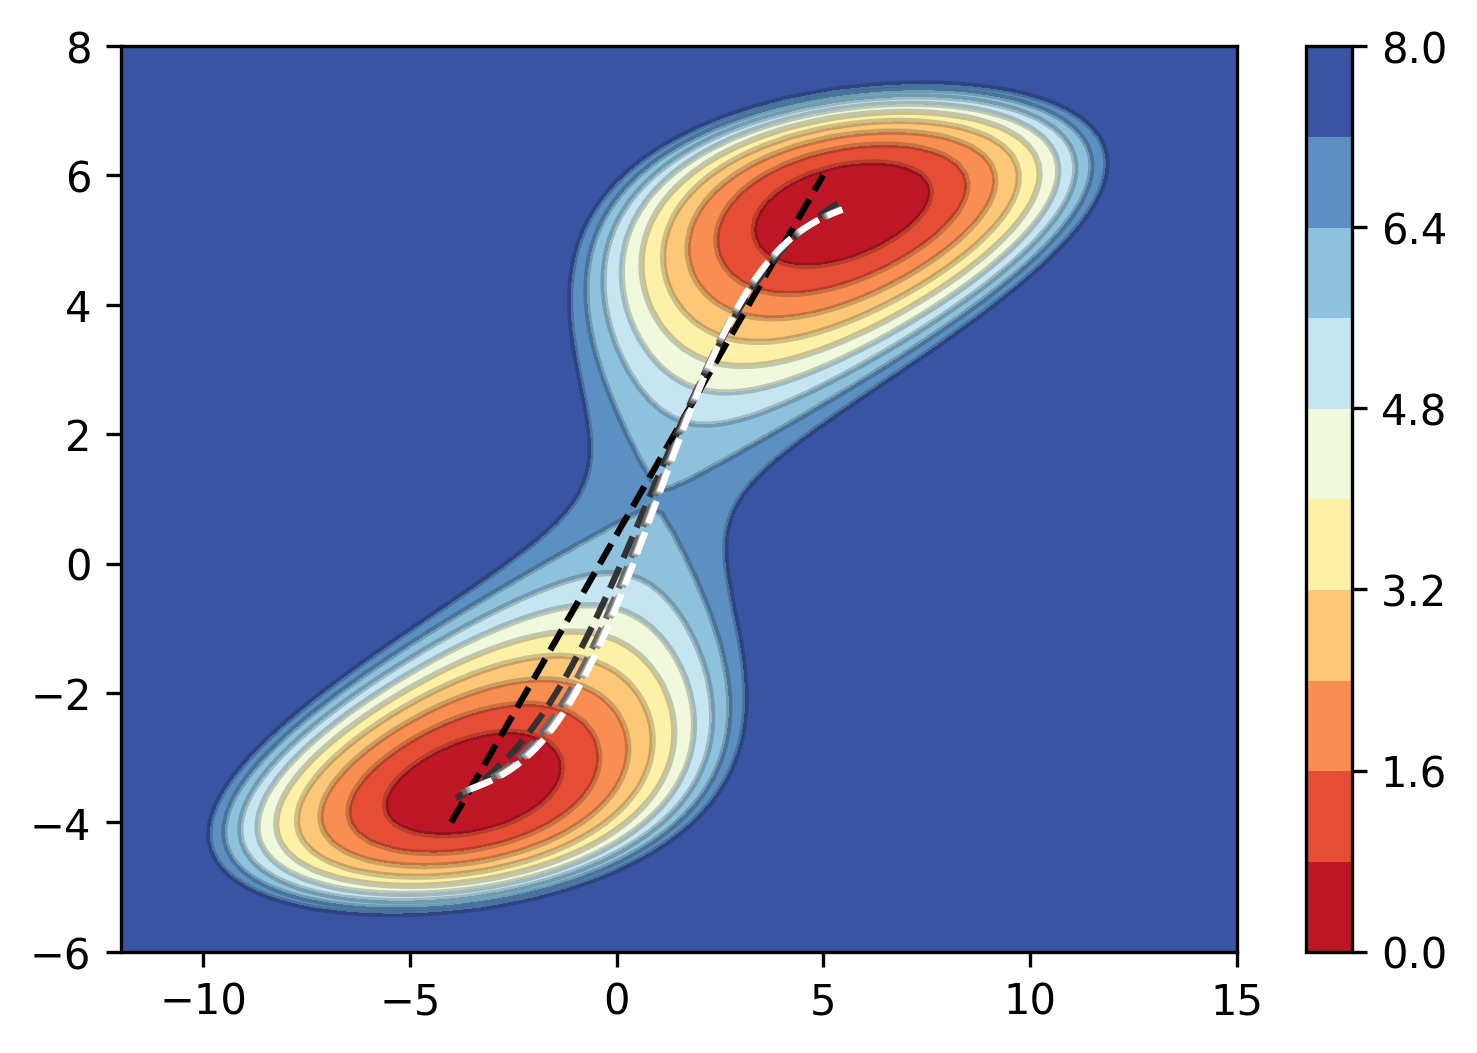

In [14]:
S.plot_string_evolution(clip_max=8, levels=10)

(<Figure size 1800x1200 with 2 Axes>,
 <matplotlib.colorbar.Colorbar at 0x7fe44efa0bd0>)

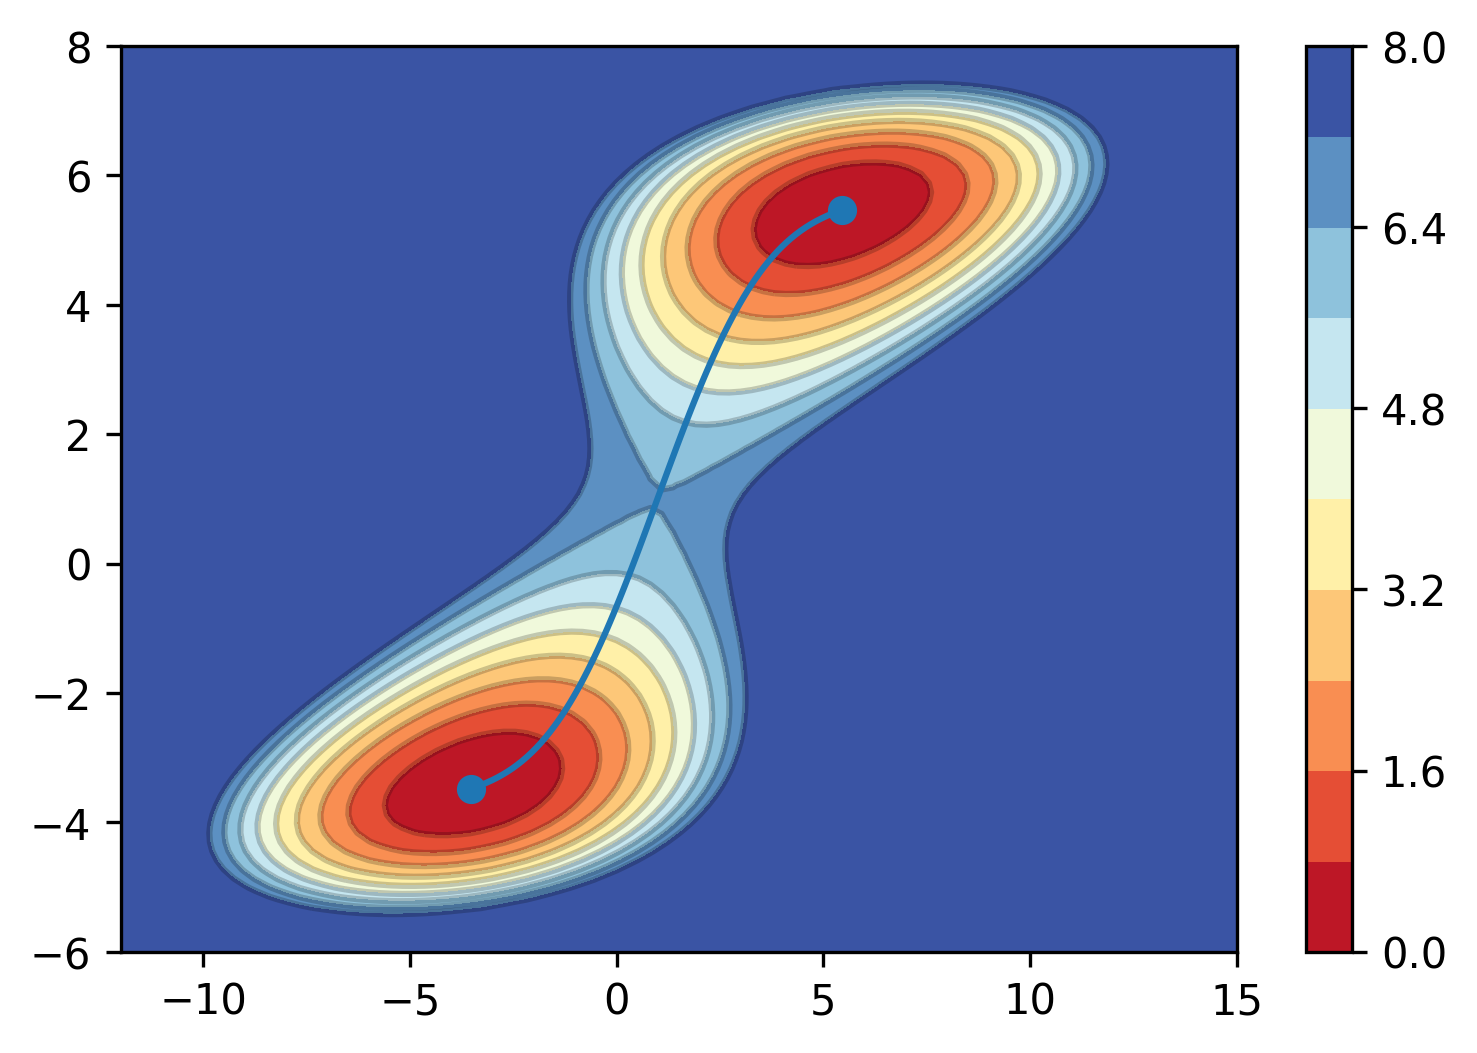

In [15]:
S.plot_mep(clip_max=8, levels=10)

(<Figure size 1800x1200 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe44f6bc650>)

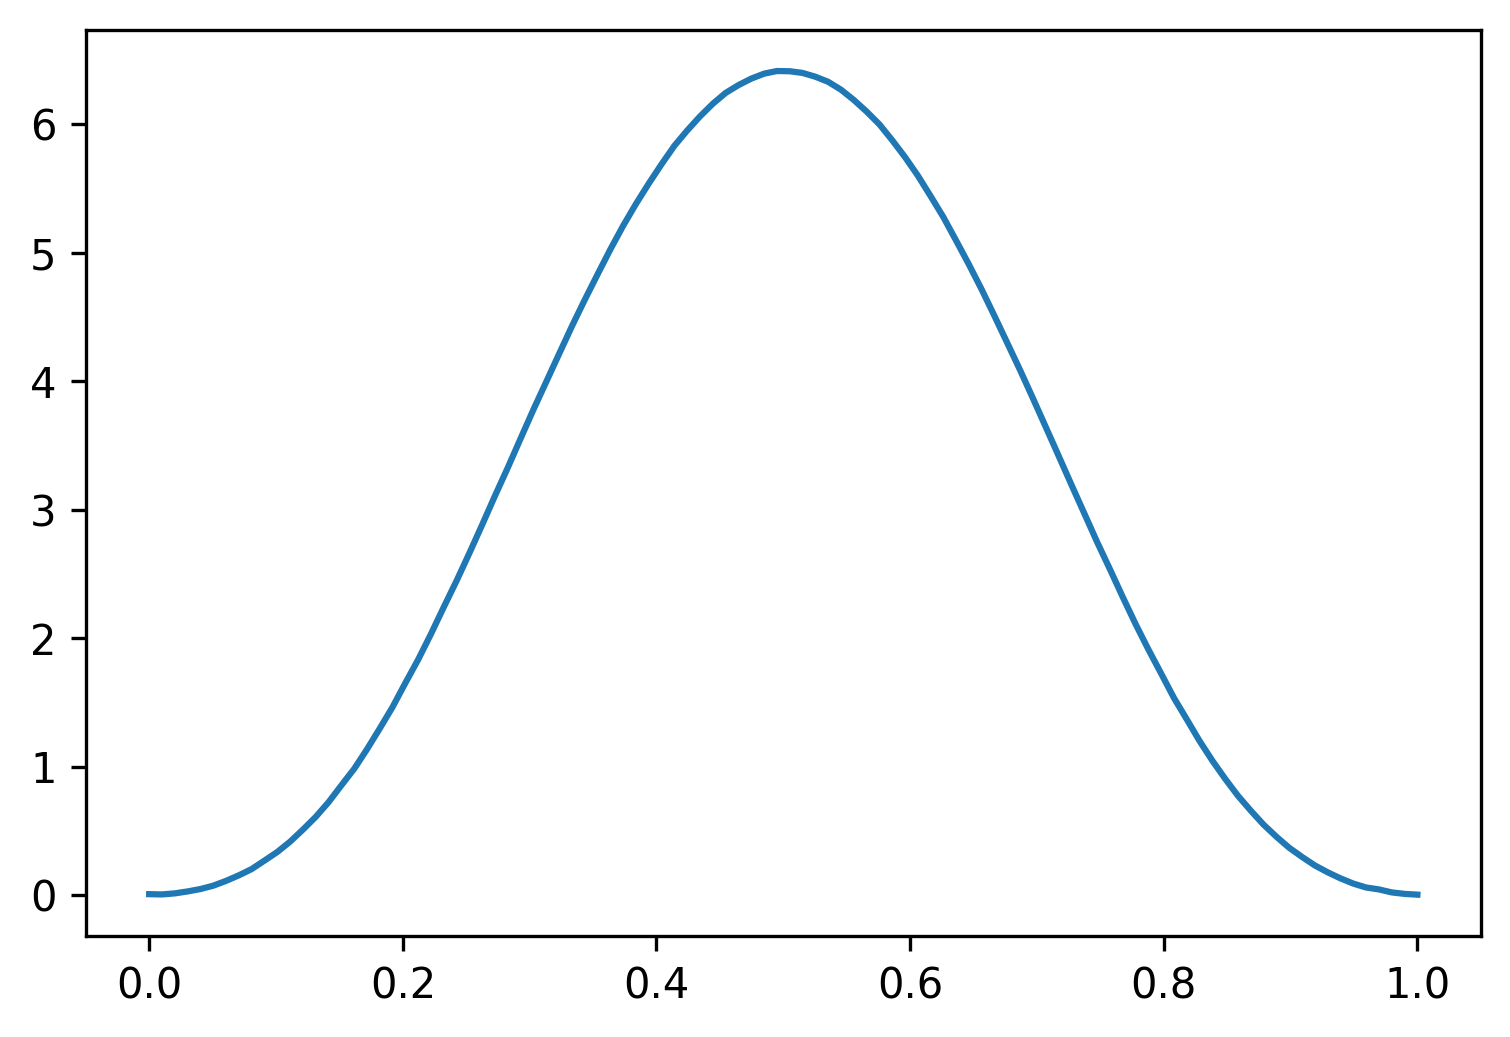

In [16]:
S.plot_mep_energy_profile()